In [75]:
%load_ext autoreload
%autoreload 2

import sys 
import os 

home = os.path.join('..','..')

pths = [os.path.join(home, 'pincam')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)
        
from pincam.utils import *
from pincam import Pincam 
from pincam.matrix_utils2 import MatrixUtils2 as mu

from ladybug_geometry.geometry2d.line import LineSegment2D

import matplotlib.pyplot as plt

r = lambda d: d / 180. * np.pi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
# Define surfaces
bot_srf = np.array(
    [[-5, -5, 0], [5, -5, 0], [5, 5, 0], [-5, 5, 0]])
top_srf = np.array(
    [[-5, -5, 10], [5, -5, 10], [5, 5, 10], [-5, 5, 10]])
vrt_srf = np.array(
    [[-4, 0, 0], [4, 0, 0], [4, 0, 6], [0, 0, 10], [-4, 0, 6]])

# Define surfaces
bot_box = np.array(
    [[-10, -10, -10], [10, -10, -10], [10, 10, -10], [-10, 10, -10]])
top_box = np.array(
    [[-10, -10, 10], [10, -10, 10], [10, 10, 10], [-10, 10, 10]])
side_box1 = np.array(
    [[-10, -10, -10], [10, -10, -10], [10, -10, 10], [-10, -10, 10]])
side_box2 = np.array(
    [[-10, 10, -10], [10, 10, -10], [10, 10, 10], [-10, 10, 10]])
side_box3 = np.array(
    [[-10, -10, -10], [-10, 10, -10], [-10, 10, 10], [-10, -10, 10]])
side_box4 = np.array(
    [[10, -10, -10], [10, 10, -10], [10, 10, 10], [10, -10, 10]])

#ptmtx = [top_srf, bot_srf, vrt_srf] 
ptmtx = [bot_box, top_box, side_box1, side_box2, side_box3]

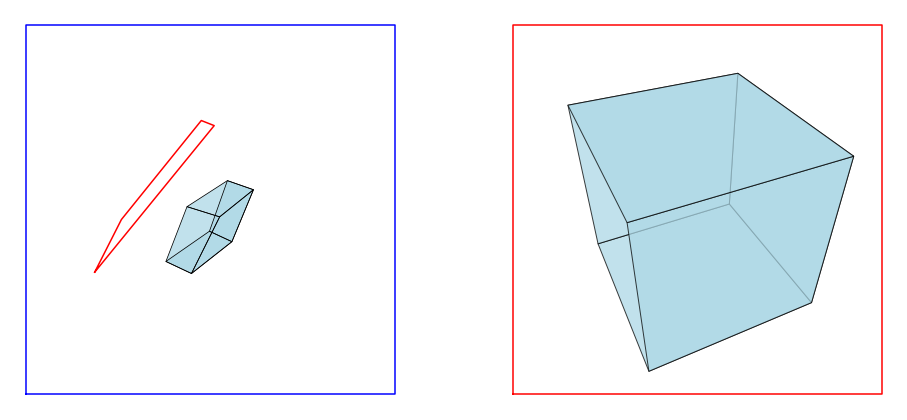

In [132]:
focal_length = 20
heading = r(-25)
pitch = r(40)
cam_point = np.array([0, -45, 0])
cam = Pincam(cam_point, heading, pitch, focal_length)

_ptmtx = cam.view_frustum_geometry(ptmtx)
c = _ptmtx.pop()

# Make a second camera
focal_length = 18
heading = r(60)
pitch = r(15)
cam_point2 = np.array([0, -250, 10])
cam2 = Pincam(cam_point2, heading, pitch, focal_length)
df = gpd.GeoDataFrame({})
df['geometry'] = cam2.to_gpd_geometry(_ptmtx)# ptmtx)
c = cam2.to_gpd_geometry([c])[0]

# Plot
f, _a = plt.subplots(1,2, figsize=(16, 12))
a = _a[0]
a = df.plot(edgecolor='black', alpha=0.75, ax=a, lw=0, facecolor='lightblue')
a = df.plot(edgecolor='black', facecolor="none", lw=0.75, ax=a)
a.plot(*c.exterior.xy, 'red')
b = cam2.sensor_plane_ptmtx_2d
a.plot(b[:,0], b[:,1], 'blue')
_ = a.axis(False)

a = _a[1]
df2 = gpd.GeoDataFrame({})
df2['geometry'] = cam.to_gpd_geometry(ptmtx)
a = df2.plot(edgecolor='black', alpha=0.75, ax=a, facecolor='lightblue')
b = cam2.sensor_plane_ptmtx_2d
a.plot(b[:,0], b[:,1], 'red')
a.grid(False) 
_ = a.axis(False)

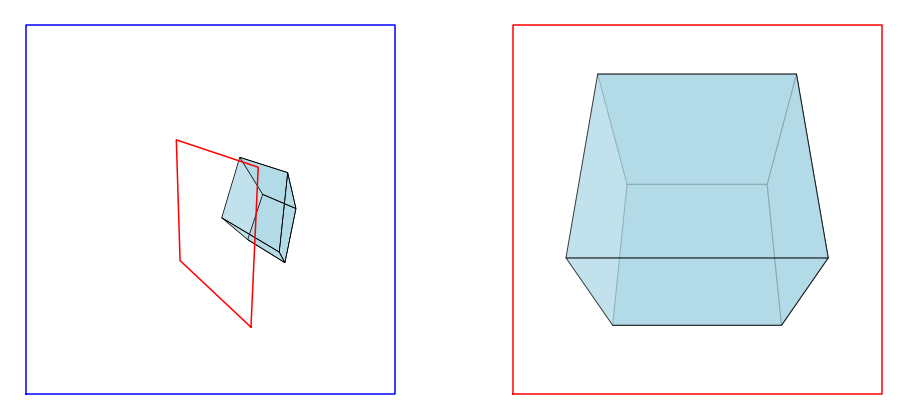

In [122]:
focal_length = 20
heading = r(0)
pitch = r(60)
cam_point = np.array([0, -45, 0])
cam = Pincam(cam_point, heading, pitch, focal_length)

_ptmtx = cam.view_frustum_geometry2(ptmtx)
c = _ptmtx.pop()

# Make a second camera
focal_length = 18
heading = r(60)
pitch = r(20)
cam_point2 = np.array([0, -250, 10])
cam2 = Pincam(cam_point2, heading, pitch, focal_length)
df = gpd.GeoDataFrame({})
df['geometry'] = cam2.to_gpd_geometry(_ptmtx) #+ ptmtx)
c = cam2.to_gpd_geometry([c])[0]

# Plot
f, _a = plt.subplots(1,2, figsize=(16, 12))
a = _a[0]
a = df.plot(edgecolor='black', alpha=0.75, ax=a, lw=0, facecolor='lightblue')
a = df.plot(edgecolor='black', facecolor="none", lw=0.75, ax=a)
a.plot(*c.exterior.xy, 'red')
b = cam2.sensor_plane_ptmtx_2d
a.plot(b[:,0], b[:,1], 'blue')
_ = a.axis(False)

a = _a[1]
df2 = gpd.GeoDataFrame({})
df2['geometry'] = cam.to_gpd_geometry(ptmtx)
a = df2.plot(edgecolor='black', alpha=0.75, ax=a, facecolor='lightblue')
b = cam2.sensor_plane_ptmtx_2d
a.plot(b[:,0], b[:,1], 'red')
a.grid(False) 
_ = a.axis(False)